Assignment: Problem Statement – Machine Learning

predicting the IPL score after 6 overs

In [1]:
#reading the dataset
import pandas as pd
df = pd.read_csv('IPL DATASET.csv')

In [2]:
df= df.rename(columns={df.columns[0]: 'ID'})

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          1663 non-null   int64  
 1   venue_boundaries            1663 non-null   int64  
 2   venue_highest_runs          1663 non-null   int64  
 3   venue_boundaries_first_six  1663 non-null   int64  
 4   venue_avg_wicket            1663 non-null   int64  
 5   SR                          1663 non-null   float64
 6   avg                         1663 non-null   float64
 7   batting_team                1663 non-null   object 
 8   bowling_team                1663 non-null   object 
 9   BF                          1663 non-null   float64
 10  runs                        1663 non-null   float64
 11  _4s                         1663 non-null   float64
 12  _6s                         1663 non-null   float64
 13  _30s                        1663 

In [4]:
df.describe()

,ID,venue_boundaries,venue_highest_runs,venue_boundaries_first_six,venue_avg_wicket,SR,avg,BF,runs,_4s,_6s,_30s,_50s,economy,wickets,innings,runs_after_6ovs
count,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000
mean,831.000000,43.382441,221.741431,25.955502,5.148527,1.256342,26.595947,2003.094193,2532.018258,249.008548,88.697376,93.585195,93.585195,7.727169,76.502566,1.535177,45.207456
std,480.211065,22.008378,23.820160,13.603919,0.415055,0.066862,3.346851,773.763725,1019.352004,99.380153,47.252825,32.158176,32.158176,0.358505,29.394384,0.575101,12.781027
min,0.000000,18.000000,161.000000,12.000000,4.000000,0.984000,15.461538,125.000000,123.000000,18.500000,1.000000,6.500000,6.500000,6.342970,9.750000,1.000000,2.000000
25%,415.500000,30.000000,205.000000,18.000000,5.000000,1.216349,24.552083,1445.375000,1839.500000,179.500000,56.550000,72.666667,72.666667,7.479497,55.666667,1.000000,37.000000
50%,831.000000,32.000000,231.000000,19.000000,5.000000,1.258283,26.413223,1991.000000,2474.250000,243.000000,80.500000,93.000000,93.000000,7.715340,74.000000,2.000000,45.000000
75%,1246.500000,63.000000,232.000000,38.000000,5.000000,1.298706,28.367922,2507.500000,3176.250000,311.100000,111.000000,115.500000,115.500000,7.953636,95.500000,2.000000,53.000000
max,1662.000000,93.000000,263.000000,61.000000,7.000000,1.456687,36.981818,4057.500000,5418.500000,555.500000,295.000000,171.000000,171.000000,8.950355,172.000000,6.000000,105.000000


In [5]:
df.isnull().sum()

ID                            0
venue_boundaries              0
venue_highest_runs            0
venue_boundaries_first_six    0
venue_avg_wicket              0
SR                            0
avg                           0
batting_team                  0
bowling_team                  0
BF                            0
runs                          0
_4s                           0
_6s                           0
_30s                          0
_50s                          0
economy                       0
wickets                       0
innings                       0
runs_after_6ovs               0
dtype: int64

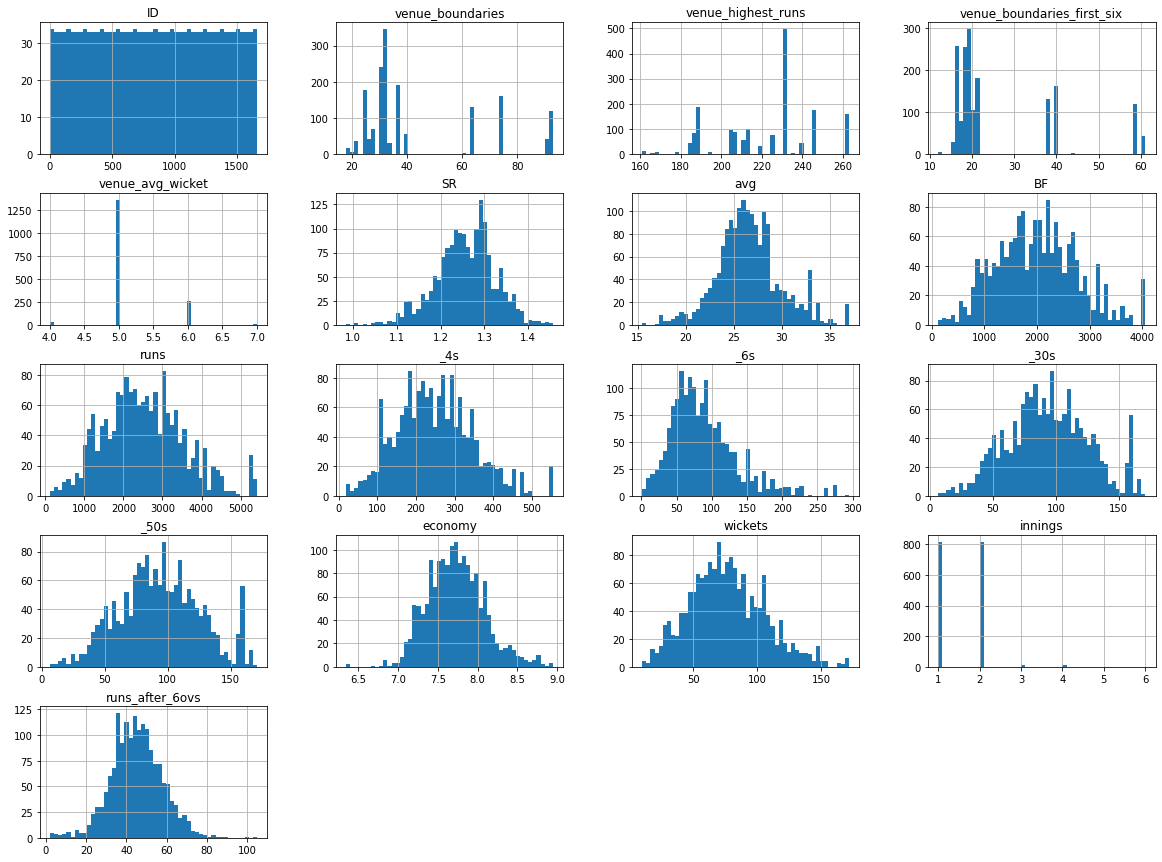

In [6]:
#visualizing the data distribution through histograms
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
#label encoding for nominal data (batting_team, bowling team)

# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df['ball_team']= label_encoder.fit_transform(df['bowling_team' ]) 
df['bat_team']= label_encoder.fit_transform(df['batting_team' ]) 

print(df.head())

   ID  venue_boundaries  ...  ball_team  bat_team
0   0                74  ...         13         7
1   1                74  ...          7        13
2   2                30  ...          5         0
3   3                30  ...          0         5
4   4                32  ...          3        10

[5 rows x 21 columns]


In [8]:
# dropping out the categorical columns
df=df.drop(["batting_team", "bowling_team"], axis = 1)

In [9]:
# normalizing the data towards mean
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
feature_scale=[feature for feature in df.columns if feature not in ['ID','runs_after_6ovs']]

feature_scale=['venue_boundaries', 'venue_highest_runs',
       'venue_boundaries_first_six', 'venue_avg_wicket', 'SR', 'avg',
       'bat_team', 'ball_team', 'BF', 'runs', '_4s', '_6s', '_30s',
       '_50s', 'economy', 'wickets', 'innings']
scaler.fit(df[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [10]:
from scipy.stats import zscore
z_scores = zscore(df)
z_scores

array([[-1.7310096 ,  1.3915959 ,  1.73260716, ...,  1.23599567,
         1.37174692,  0.00411673],
       [-1.72892655,  1.3915959 ,  1.73260716, ..., -1.50326214,
         0.00274404,  1.37334039],
       [-1.72684351, -0.60824414, -0.36708656, ...,  0.6098796 ,
        -0.45359025, -1.59331087],
       ...,
       [ 1.72684351,  0.80073407,  0.55677868, ..., -0.95541058,
        -1.13809169, -1.59331087],
       [ 1.72892655,  0.80073407,  0.55677868, ...,  1.54905371,
        -1.59442598, -1.13690299],
       [ 1.7310096 ,  2.25516319,  1.01871129, ...,  0.37508607,
         1.59991407,  0.00411673]])

In [11]:
# import numpy as np
# # abs_z_scores = np.abs(z_scores)
# # filtered_entries = (abs_z_scores < 3).all(axis=1)
# # new_df = df[filtered_entries]

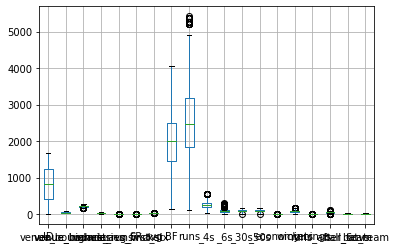

In [12]:
# checking for the outliers
df.boxplot()

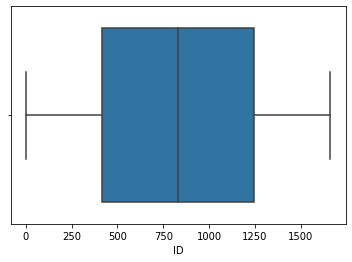

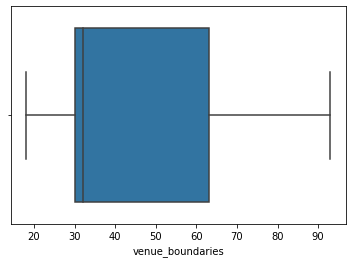

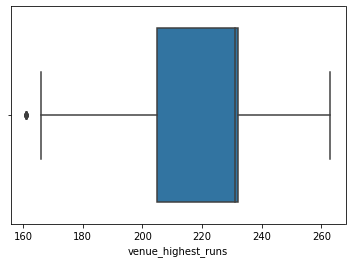

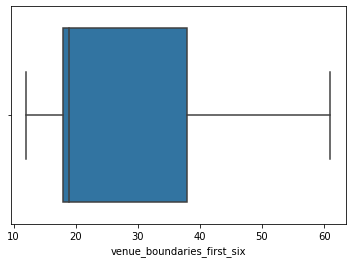

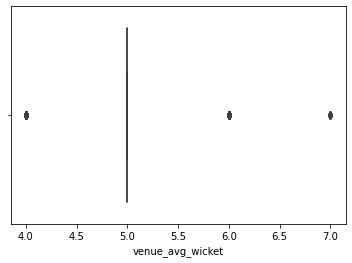

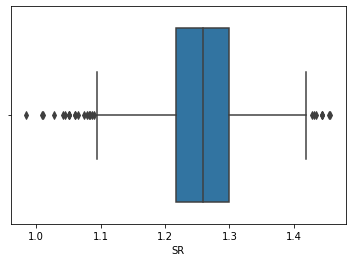

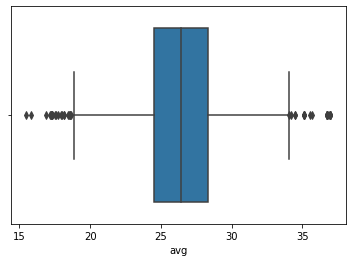

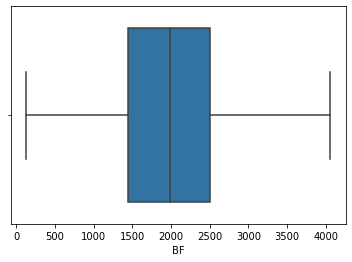

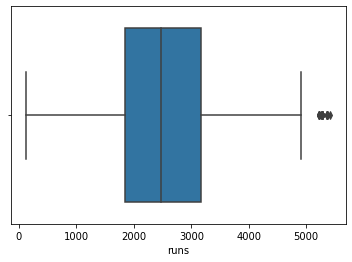

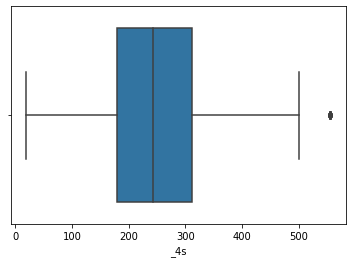

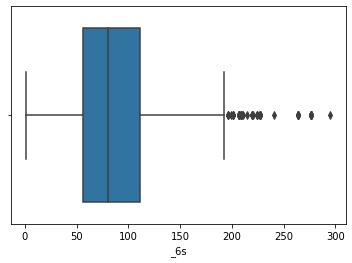

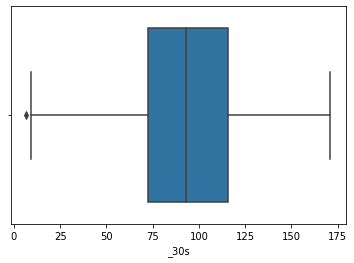

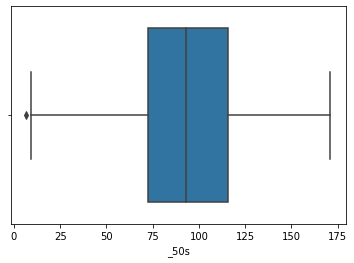

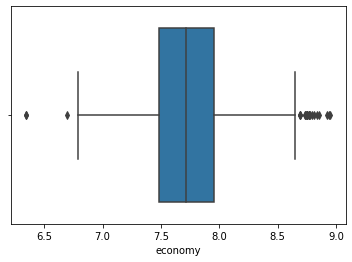

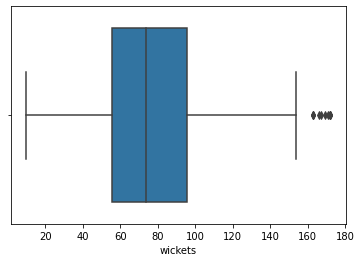

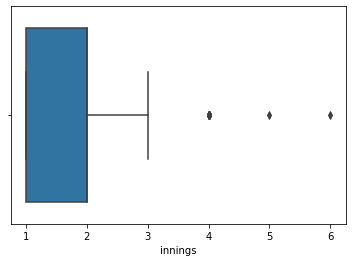

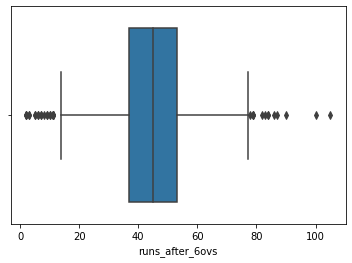

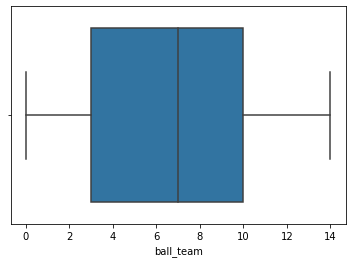

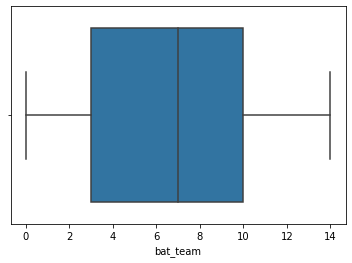

In [13]:
# checking for the outliers in each column
import seaborn as sns
for column in df.columns:
  sns.boxplot(x=df[column])
  plt.show()

In [14]:
outlier_columns= ['SR', 'avg', 'runs', '_6s', '_30s', 'economy', 'wickets', 'runs_after_6ovs']

In [15]:
## storing names of columns in outlier_columns
## importing matplotlib and seaborn for visualisation of outliers
import matplotlib.pyplot as plt
import seaborn as sns   

## iterating through outlier_columns using try and except for distinguishing between numerical and categorical columns
for j in outlier_columns:
    try:
        ##visualisation of outliers
        # a = sns.boxplot(data=df,x=df[j])
        # plt.tight_layout() 
        # plt.show() 

        xy=df[j]    
        mydata=pd.DataFrame()

        updated=[]
        Q1,Q3=np.percentile(xy,[25,75])
        IQR=Q3-Q1
        minimum=Q1-1.5*IQR
        maximum=Q3+1.5*IQR

        ## using the maximum and minimum values obtained from quartiles and inter-quartile range
        ## any outliers greater than maximum are updated to be equal to maximum
        ## any outliers lesser than minimum are updated to be equal to minimum
        ## here, no outliers have been removed to prevent loss of data

        for i in xy:
            if(i>maximum):
                i=maximum
                updated.append(i)
            elif(i<minimum):
                i=minimum
                updated.append(i)
            else:
                updated.append(i)

        df[j]=updated
        print('After Removing Outliers')

        ## visualising after removing outliers
        b= sns.boxplot(data=df,x=df[j])
        plt.tight_layout() 
        plt.show()

    except:
        continue
# return df

In [16]:
df.head()

,ID,venue_boundaries,venue_highest_runs,venue_boundaries_first_six,venue_avg_wicket,SR,avg,BF,runs,_4s,_6s,_30s,_50s,economy,wickets,innings,runs_after_6ovs,ball_team,bat_team
0,0,74,263,40,5,1.154072,24.839080,1248.333333,1440.666667,145.000000,58.000000,58.000000,58.000000,7.585662,80.666667,1,61,13,7
1,1,74,263,40,5,1.188508,27.436073,1685.166667,2002.833333,192.666667,54.666667,73.000000,73.000000,8.074994,70.000000,2,26,7,13
2,2,30,213,21,5,1.197900,26.247788,1650.666667,1977.333333,228.000000,48.333333,75.333333,75.333333,7.819892,33.000000,1,53,5,0
3,3,30,213,21,5,1.137993,18.142857,279.000000,317.500000,33.000000,10.000000,17.500000,17.500000,8.617622,31.500000,2,63,0,5
4,4,32,231,19,6,1.331647,23.109718,1384.000000,1843.000000,165.500000,89.500000,79.750000,79.750000,7.245421,17.666667,1,40,3,10


In [17]:
corr_matrix = df.corr()
corr_matrix["runs_after_6ovs"].sort_values(ascending=False)

runs_after_6ovs               1.000000
_4s                           0.122037
avg                           0.103800
economy                       0.100068
venue_highest_runs            0.092666
ID                            0.081885
runs                          0.080963
BF                            0.076668
SR                            0.066781
venue_boundaries_first_six    0.062110
venue_boundaries              0.059206
_50s                          0.050346
_30s                          0.050346
venue_avg_wicket              0.048744
_6s                           0.035744
bat_team                     -0.014604
ball_team                    -0.023300
wickets                      -0.078579
innings                      -0.112361
Name: runs_after_6ovs, dtype: float64

As we can see.. there's so less correlation between dependaet and independent attributes which will definitely going to effect the performance of the model

In [18]:
#removing less correlated (corr<0.07) attributes since it might effect the model accuracy
more_correlated_columns=['ID', 'venue_highest_runs', 'SR', 'avg', 'BF',
       'runs', '_4s','economy', 'wickets', 'innings', 'runs_after_6ovs']

In [19]:
df_new= df[more_correlated_columns]

In [20]:
y=df['runs_after_6ovs']

In [21]:
df_new.drop("runs_after_6ovs", axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
X= df_new

In [23]:
X.head()

,ID,venue_highest_runs,SR,avg,BF,runs,_4s,economy,wickets,innings
0,0,263,1.154072,24.839080,1248.333333,1440.666667,145.000000,7.585662,80.666667,1
1,1,263,1.188508,27.436073,1685.166667,2002.833333,192.666667,8.074994,70.000000,2
2,2,213,1.197900,26.247788,1650.666667,1977.333333,228.000000,7.819892,33.000000,1
3,3,213,1.137993,18.142857,279.000000,317.500000,33.000000,8.617622,31.500000,2
4,4,231,1.331647,23.109718,1384.000000,1843.000000,165.500000,7.245421,17.666667,1


In [122]:
# applying train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 38)


In [123]:
#import libraries for pre-processing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from dateutil.parser import parse
from datetime import datetime
from scipy.stats import norm

# import all what you need for machine learning
import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

In [124]:

#fit decision tree
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
#fit random forest
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(x_train, y_train)
#fit regression
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [125]:
models= [('lin_reg', lin_reg), ('random forest', forest), ('decision tree', tree)]
from sklearn.metrics import mean_squared_error
for i, model in models:    
    predictions = model.predict(x_train)
    MSE = mean_squared_error(y_train, predictions)
    RMSE = np.sqrt(MSE)
    msg = "%s = %.2f" % (i, round(RMSE, 2))
    print('RMSE of', msg)
    print(MSE)

RMSE of lin_reg = 12.41
154.03648376940393
RMSE of random forest = 4.32
18.689624779470726
RMSE of decision tree = 0.00
0.0


In [126]:
models= [('lin_reg', lin_reg), ('forest', forest), ('dt', tree)]
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

#for each model I want to test three different scoring metrics. Therefore, results[0] will be lin_reg x MSE, 
# results[1] lin_reg x MSE and so on until results [8], where we stored dt x r2

results= []
metric= []
for name, model in models:
    for i in scoring:
        scores = cross_validate(model, x_train, y_train, scoring=i, cv=10, return_train_score=True)
        results.append(scores)

In [127]:
results[8]


{'fit_time': array([0.0132153 , 0.01299334, 0.01388717, 0.01327085, 0.01307631,
        0.01380706, 0.01267648, 0.01315379, 0.01288676, 0.01327991]),
 'score_time': array([0.00141931, 0.00142026, 0.00144005, 0.00146198, 0.00145745,
        0.00141478, 0.00138617, 0.00147009, 0.00139213, 0.00138807]),
 'test_score': array([-0.46251601, -0.80740012, -0.66011436, -0.37308975, -0.46567053,
        -0.48926867, -0.72462954, -0.67109548, -0.62171973, -1.00160821]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [128]:
#THIS IS FOR Linear regression
#if you change sign and square the Mean Square Error you get the RMSE, which is the most common metric to accuracy
LR_RMSE_mean = np.sqrt(-results[0]['test_score'].mean())
LR_RMSE_std= results[0]['test_score'].std()
# note that also here I changed the sign, as the result is originally a negative number for ease of computation
LR_MAE_mean = -results[1]['test_score'].mean()
LR_MAE_std= results[1]['test_score'].std()
LR_r2_mean = results[2]['test_score'].mean()
LR_r2_std = results[2]['test_score'].std()

#THIS IS FOR RF
RF_RMSE_mean = np.sqrt(-results[3]['test_score'].mean())
RF_RMSE_std= results[3]['test_score'].std()
RF_MAE_mean = -results[4]['test_score'].mean()
RF_MAE_std= results[4]['test_score'].std()
RF_r2_mean = results[5]['test_score'].mean()
RF_r2_std = results[5]['test_score'].std()

#THIS IS FOR DT
DT_RMSE_mean = np.sqrt(-results[6]['test_score'].mean())
DT_RMSE_std= results[6]['test_score'].std()
DT_MAE_mean = -results[7]['test_score'].mean()
DT_MAE_std= results[7]['test_score'].std()
DT_r2_mean = results[8]['test_score'].mean()
DT_r2_std = results[8]['test_score'].std()

In [129]:
modelDF = pd.DataFrame({
    'Model'       : ['Linear Regression', 'Random Forest', 'Decision Trees'],
    'RMSE_mean'    : [LR_RMSE_mean, RF_RMSE_mean, DT_RMSE_mean],
    'RMSE_std'    : [LR_RMSE_std, RF_RMSE_std, DT_RMSE_std],
    'MAE_mean'   : [LR_MAE_mean, RF_MAE_mean, DT_MAE_mean],
    'MAE_std'   : [LR_MAE_std, RF_MAE_std, DT_MAE_std],
    'r2_mean'      : [LR_r2_mean, RF_r2_mean, DT_r2_mean],
    'r2_std'      : [LR_r2_std, RF_r2_std, DT_r2_std],
    }, columns = ['Model', 'RMSE_mean', 'RMSE_std', 'MAE_mean', 'MAE_std', 'r2_mean', 'r2_std'])

modelDF.sort_values(by='r2_mean', ascending=False)

,Model,RMSE_mean,RMSE_std,MAE_mean,MAE_std,r2_mean,r2_std
1,Random Forest,11.611968,16.829682,9.134964,0.458783,0.192576,0.080985
0,Linear Regression,12.543838,16.484640,9.653825,0.600286,0.056862,0.044803
2,Decision Trees,16.766003,39.928754,13.133039,0.865539,-0.627711,0.179442


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


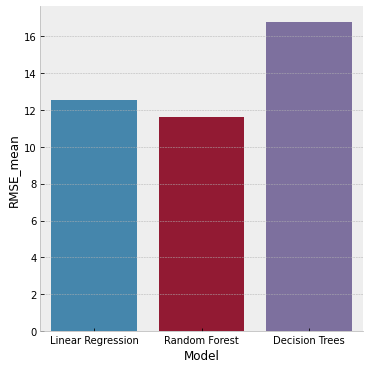

In [130]:
sns.factorplot(x= 'Model', y= 'RMSE_mean', data= modelDF, kind='bar', legend='True')


In [131]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [132]:
#now let's how the RMSE changes for each parameter configuration
cvres = grid_search_forest.cv_results_
cvres

{'mean_fit_time': array([0.05517435, 0.11771414, 0.07208824, 0.16542401, 0.06770475,
        0.1483566 , 0.08999109, 0.2059087 , 0.06528187, 0.14530206,
        0.09139693, 0.20628996, 0.06142986, 0.13918412, 0.09029732,
        0.208319  , 0.08236668, 0.18926387, 0.12110457, 0.2842037 ,
        0.083196  , 0.19003615, 0.12023997, 0.28206725]),
 'mean_score_time': array([0.10333951, 0.1034749 , 0.10335932, 0.10332386, 0.10359495,
        0.10334613, 0.10340331, 0.10334487, 0.10333745, 0.10323215,
        0.10340889, 0.10336888, 0.10341921, 0.10338213, 0.10323832,
        0.10329611, 0.10322616, 0.10336833, 0.10329287, 0.10346208,
        0.10327625, 0.1032825 , 0.10322778, 0.10332813]),
 'mean_test_score': array([-140.10464571, -134.44030997, -140.51749914, -135.60633795,
        -145.76095619, -136.07656335, -145.24923716, -138.97838754,
        -150.57515529, -139.24628777, -144.16369316, -138.02186115,
        -143.93271116, -141.6839041 , -197.10772914, -194.65031959,
        -154.

In [133]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

11.836580828485555 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
11.594839799250382 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
11.854007724814448 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
11.645013437224545 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 25}
12.073150218296316 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
11.665185954576065 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 25}
12.051939145269955 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 10}
11.78890951448204 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 25}
12.27090686503335 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}
11.80026642804743 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 25}
12.006818611159675 {'bootstrap': True, 'max_d

In [134]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [135]:
# Performance metrics
grid_best= grid_search_forest.best_estimator_.predict(x_train)
errors = abs(grid_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')

The best model from grid-search has an accuracy of 82.63 %


In [136]:
#RMSE
grid_mse = mean_squared_error(y_train, grid_best)
grid_rmse = np.sqrt(grid_mse)
print('The best model from the grid search has a RMSE of', round(grid_rmse, 2))

The best model from the grid search has a RMSE of 8.14


In [137]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [138]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   33.9s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                  

In [139]:
#now let's how the RMSE changes for each parameter configuration
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

12.082733227586052 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
12.083223738629473 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
11.483181635372668 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
11.77894919022459 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
12.36192056802435 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
11.523416453454887 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
11.530043816197475 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
11.48500083346933 {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
12.383130750901069 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
11.511404139918112 {'n_estimators': 110, 'min_samples

In [140]:
# best random model 
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=23, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=65, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [141]:
rf_random.best_params_


{'max_depth': 23,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 65}

In [142]:
# Performance metrics (MAPE)
random_best= rf_random.best_estimator_.predict(x_train)
errors = abs(random_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from the randomized search has an accuracy of', round(accuracy, 2),'%')

The best model from the randomized search has an accuracy of 84.03 %


In [143]:
#this is the RMSE
final_mse = mean_squared_error(y_train, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model from the randomized search has a RMSE of', round(final_rmse, 2))

The best model from the randomized search has a RMSE of 7.05


In [144]:
# extract the numerical values of feature importance from the grid search
importances = rf_random.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

#see df
print(df)

   importance             feature
0    0.151555             innings
1    0.137171                  ID
2    0.105590                  SR
3    0.100356             economy
4    0.099443                 _4s
5    0.087640             wickets
6    0.087347                 avg
7    0.085151                runs
8    0.085137                  BF
9    0.060610  venue_highest_runs


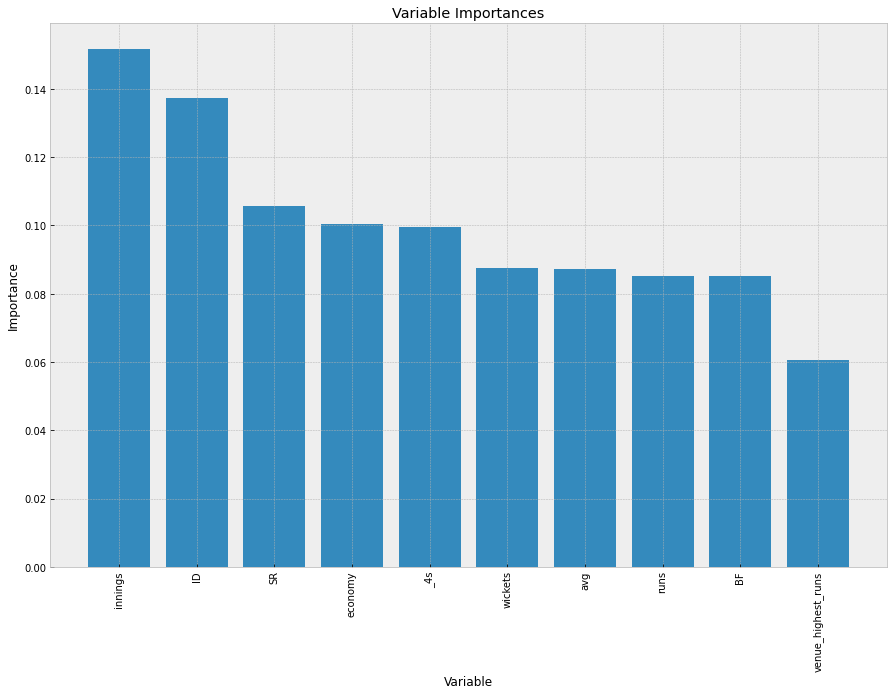

In [145]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [146]:
final_model = rf_random.best_estimator_
# Predicting test set results
final_pred = final_model.predict(x_test)
final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
print('The final RMSE on the test set is', round(final_rmse, 2))

The final RMSE on the test set is 11.25


In [147]:
#calculate accuracy
errors = abs(final_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model achieves on the test set an accuracy of', round(accuracy, 2),'%')

The best model achieves on the test set an accuracy of 76.4 %


Text(0.5, 0, 'Tree depth')

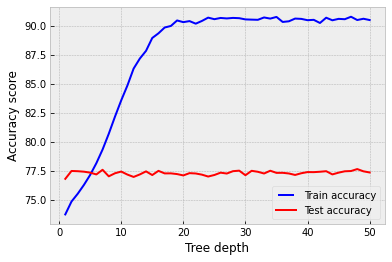

In [149]:
max_depths = np.linspace(1, 50, 50, endpoint=True)

train_results = []
test_results = []

for i in max_depths:
    dt = RandomForestRegressor(max_depth=i)
    dt.fit(x_train, y_train)    
    #compute accuracy for train data
    score_tree = dt.predict(x_train)
    errors = abs(score_tree - y_train)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_train)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    train_results.append(accuracy)
    
    #now again for test data
    score_tree = dt.predict(x_test)
    errors = abs(score_tree - y_test)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_test)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    test_results.append(accuracy)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train accuracy')
line2, = plt.plot(max_depths, test_results, 'r', label= 'Test accuracy')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')